<p style="font-family:verdana;font-size:200%;text-align:center;">신용카드 데이터 분석</p>

### 부제 : Python을 활용한 탐색적 데이터 분석

### 이번 시간 강의 내용

1. 실습 데이터셋 준비 : **chardet** & **pandas** 라이브러리
1. 탐색적 데이터 분석
1. 데이터 시각화 : **seaborn** & **matplotlib** 라이브러리
1. 지도 시각화 : **folium** 라이브러리

### 강의자료 준비

* 작업경로로 사용할 폴더를 생성합니다.
 - 문서(Documents) 폴더에 **BC_Korea**라는 폴더를 생성합니다.
 - Windows : 'C:/Users/User_name/Documents/BC_Korea'
 - MacOS : '/Users/User_name/Documents/BC_Korea'


* 이번 강의에 사용될 [코드 및 데이터](https://codeload.github.com/MrKevinNa/BC_Korea/zip/refs/heads/main)를 압축파일로 내려받습니다.
 - 일반적으로 압축파일은 다운로드(Downloads) 폴더에 저장되어 있습니다.
 - 압축파일에는 **code** 및 **data** 폴더가 포함되어 있습니다.
 - 압축파일을 풀고 **code** 및 **data** 폴더를 작업경로인 **BC_Korea** 폴더로 옮깁니다.


* [BC카드 금융 빅데이터 플랫폼](https://www.bigdata-finance.kr)에서 내려받은 데이터를 **data** 폴더로 옮깁니다.
 - 데이터를 내려받는 방법은 사전에 이메일로 발송되었습니다.

### 실습 데이터셋 준비 : chardet & pandas 라이브러리

In [1]:
# 라이브러리를 호출합니다.
import os, chardet
import numpy as np
import pandas as pd

In [2]:
# 현재 작업경로를 확인합니다.
os.getcwd()

'C:\\Users\\Sum\\Desktop\\Sumin\\06.STUDY\\DATA\\01.python\\BC카드 금융빅데이터플랫폼 활용교육\\code'

In [3]:
# data 폴더로 작업경로를 변경합니다. (상대경로 사용)
os.chdir(path = '../data')

In [4]:
# 작업경로에 포함된 폴더명과 파일명을 출력합니다.
os.listdir()

['20210709112650186교육용_데이터_수정(강남구).csv', 'APT_Price_Gangnam.txt']

In [5]:
# 신용카드 데이터 파일명을 지정합니다. - 파일명 오타 잘 나니, 쓰지말고 복붙하기
fileName = '20210709112650186교육용_데이터_수정(강남구).csv'

2019.5, 2020.5, 2021.5 마다  
서울 강남구에 있는 가맹점마다 업종명, 결제한 건수, 금액, 고객수가 있는 데이터  
성별/ 연령대별 / 가구생애주기별(1인,신혼 등)

In [6]:
# 신용카드 데이터 파일을 바이너리로 읽고, raw를 생성합니다.
# 바이너리로 읽어와야 인코딩 상태를 확인할 수 있다.
raw = open(file = fileName, mode = 'rb').read()

In [7]:
# raw의 클래스를 확인합니다.
type(raw)

bytes

In [8]:
# raw의 일부를 출력합니다.
raw[:100]

b'\xb1\xe2\xc1\xd8\xc0\xcf\xc0\xda,\xb0\xa1\xb8\xcd\xc1\xa1\xc1\xd6\xbc\xd2_\xb1\xa4\xbf\xaa\xbd\xc3\xb5\xb5,\xb0\xa1\xb8\xcd\xc1\xa1\xc1\xd6\xbc\xd2_\xbd\xc3\xb1\xba\xb1\xb8,\xb0\xa1\xb8\xcd\xc1\xa1\xc1\xd6\xbc\xd2_\xc0\xbe\xb8\xe9\xb5\xbf,\xbf\xac\xb7\xc9\xb4\xeb,\xbc\xba\xba\xb0,\xb0\xa1\xb1\xb8\xbb\xfd\xbe\xd6\xc1\xd6\xb1\xe2,\xb0\xa1\xb8\xcd\xc1\xa1\xbe\xf7\xc1\xbe'

In [9]:
# raw의 인코딩 방식을 확인합니다. - 텍스트 파일을 가져올 때 확인하기
chardet.detect(raw[:100])

{'encoding': 'EUC-KR', 'confidence': 0.99, 'language': 'Korean'}

In [10]:
# raw를 디코딩하면 한글로 출력됩니다.
raw[:100].decode(encoding = 'EUC-KR')

'기준일자,가맹점주소_광역시도,가맹점주소_시군구,가맹점주소_읍면동,연령대,성별,가구생애주기,가맹점업종'

In [11]:
# 신용카드 데이터를 읽고, 데이터프레임 df를 생성합니다.
df = pd.read_csv(filepath_or_buffer = fileName, encoding = 'EUC-KR')

In [12]:
# df의 일부를 출력합니다. n 매개변수에 전달되는 인자의 기본값은 5입니다.
df.head(n = 10)

,기준일자,가맹점주소_광역시도,가맹점주소_시군구,가맹점주소_읍면동,연령대,성별,가구생애주기,가맹점업종,매출금액,매출건수,결제고객수
0,20190501,서울특별시,강남구,개포1동,20대,남성,1인 가구,편의점,38100,9,5
1,20190501,서울특별시,강남구,개포1동,20대,여성,1인 가구,대형할인점,18570,3,3
2,20190501,서울특별시,강남구,개포1동,20대,여성,1인 가구,편의점,11180,5,5
3,20190501,서울특별시,강남구,개포1동,20대미만,여성,1인 가구,편의점,13400,3,3
4,20190501,서울특별시,강남구,개포1동,30대,남성,신혼영유아 가구,대형할인점,51470,4,4
5,20190501,서울특별시,강남구,개포1동,30대,남성,신혼영유아 가구,편의점,62800,7,7
6,20190501,서울특별시,강남구,개포1동,30대,여성,신혼영유아 가구,대형할인점,46300,4,3
7,20190501,서울특별시,강남구,개포1동,30대,여성,신혼영유아 가구,편의점,20100,4,4
8,20190501,서울특별시,강남구,개포1동,40대,남성,초중고자녀 가구,대형할인점,99510,6,6
9,20190501,서울특별시,강남구,개포1동,40대,남성,초중고자녀 가구,편의점,40320,9,9


In [13]:
# df의 정보를 확인합니다.
# 행 길이, 열 길이, 열별 결측값 아닌 개수 및 자료형(data type)을 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426153 entries, 0 to 426152
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   기준일자        426153 non-null  int64 
 1   가맹점주소_광역시도  426153 non-null  object
 2   가맹점주소_시군구   426153 non-null  object
 3   가맹점주소_읍면동   426153 non-null  object
 4   연령대         426153 non-null  object
 5   성별          426153 non-null  object
 6   가구생애주기      426153 non-null  object
 7   가맹점업종       426153 non-null  object
 8   매출금액        426153 non-null  int64 
 9   매출건수        426153 non-null  int64 
 10  결제고객수       426153 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 35.8+ MB


In [14]:
# 기준일자를 날짜형으로 변환합니다.
df['기준일자'] = df['기준일자'].astype('str').astype('datetime64')

In [15]:
# df의 열별 자료형을 확인합니다.
df.dtypes

기준일자          datetime64[ns]
가맹점주소_광역시도            object
가맹점주소_시군구             object
가맹점주소_읍면동             object
연령대                   object
성별                    object
가구생애주기                object
가맹점업종                 object
매출금액                   int64
매출건수                   int64
결제고객수                  int64
dtype: object

In [16]:
# 텍스트 데이터를 읽을 때, 날짜형으로 읽을 변수명을 지정할 수 있습니다. 
# parse_dates로 읽어오면 된다.(-/. 네가지에 한해서)
df = pd.read_csv(filepath_or_buffer = fileName, encoding = 'EUC-KR', parse_dates = ['기준일자'])

In [17]:
# df의 정보를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426153 entries, 0 to 426152
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   기준일자        426153 non-null  datetime64[ns]
 1   가맹점주소_광역시도  426153 non-null  object        
 2   가맹점주소_시군구   426153 non-null  object        
 3   가맹점주소_읍면동   426153 non-null  object        
 4   연령대         426153 non-null  object        
 5   성별          426153 non-null  object        
 6   가구생애주기      426153 non-null  object        
 7   가맹점업종       426153 non-null  object        
 8   매출금액        426153 non-null  int64         
 9   매출건수        426153 non-null  int64         
 10  결제고객수       426153 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 35.8+ MB


In [18]:
# 불필요한 열을 삭제합니다.
df = df.drop(labels = ['가맹점주소_광역시도', '가맹점주소_시군구', '매출건수'], axis = 1)

In [19]:
# 일부 열이름을 변경합니다.
df = df.rename(columns = {'가맹점주소_읍면동': '읍면동', '가맹점업종': '업종명', '결제고객수': '고객수', '매출금액': '매출액'})

In [20]:
# 기준일자별 빈도수를 확인합니다.
df['기준일자'].value_counts().sort_index().reset_index()

,index,기준일자
0,2019-05-01,4715
1,2019-05-02,4759
2,2019-05-03,4916
3,2019-05-04,4819
4,2019-05-05,4278
...,...,...
88,2021-05-27,4635
89,2021-05-28,4825
90,2021-05-29,4750
91,2021-05-30,4168


In [22]:
# 기준일자에서 년, 월, 일 및 요일을 추출합니다.
df['년'] = df['기준일자'].dt.year
df['월'] = df['기준일자'].dt.month
df['일'] = df['기준일자'].dt.day
df['요일정수'] = df['기준일자'].dt.dayofweek.astype('str')
df['요일'] = df['기준일자'].dt.day_name()

In [23]:
# df의 일부를 출력합니다.
df.head()

,기준일자,읍면동,연령대,성별,가구생애주기,업종명,매출액,고객수,년,월,일,요일정수,요일
0,2019-05-01,개포1동,20대,남성,1인 가구,편의점,38100,5,2019,5,1,2,Wednesday
1,2019-05-01,개포1동,20대,여성,1인 가구,대형할인점,18570,3,2019,5,1,2,Wednesday
2,2019-05-01,개포1동,20대,여성,1인 가구,편의점,11180,5,2019,5,1,2,Wednesday
3,2019-05-01,개포1동,20대미만,여성,1인 가구,편의점,13400,3,2019,5,1,2,Wednesday
4,2019-05-01,개포1동,30대,남성,신혼영유아 가구,대형할인점,51470,4,2019,5,1,2,Wednesday


- 거래요일이 영문으로 생성되었습니다. 
- 이는 로케일 문제이므로 한글 로케일로 변경하고 변수를 다시 생성해야 합니다.

In [24]:
# 라이브러리를 호출합니다.
import locale

In [25]:
# 현재 설정된 날짜/시간 로케일을 확인합니다.
locale.getlocale(category = locale.LC_TIME)

(None, None)

In [26]:
# 날짜/시간 로케일을 '한국'으로 변경합니다.
# MacOS는 'ko_KR', Windows는 'korean'으로 지정하세요.
locale.setlocale(category = locale.LC_TIME, locale = 'ko_KR')

'ko_KR'

In [27]:
# 기준일자에서 한글 요일을 추출합니다. '%A'는 '요일'에 해당하는 포맷입니다.
df['요일'] = df['기준일자'].dt.strftime('%A')

In [28]:
# df의 일부를 출력합니다.
df.head()

,기준일자,읍면동,연령대,성별,가구생애주기,업종명,매출액,고객수,년,월,일,요일정수,요일
0,2019-05-01,개포1동,20대,남성,1인 가구,편의점,38100,5,2019,5,1,2,수요일
1,2019-05-01,개포1동,20대,여성,1인 가구,대형할인점,18570,3,2019,5,1,2,수요일
2,2019-05-01,개포1동,20대,여성,1인 가구,편의점,11180,5,2019,5,1,2,수요일
3,2019-05-01,개포1동,20대미만,여성,1인 가구,편의점,13400,3,2019,5,1,2,수요일
4,2019-05-01,개포1동,30대,남성,신혼영유아 가구,대형할인점,51470,4,2019,5,1,2,수요일


In [29]:
# 요일정수와 요일을 하나의 문자열로 결합하고, 요일정수를 삭제합니다.
cols = ['요일정수', '요일']
df['요일'] = df[cols].apply(lambda x: '-'.join(x), axis = 1)
df = df.drop(labels = ['요일정수'], axis = 1)

In [30]:
# df의 일부를 출력합니다.
df.head()

,기준일자,읍면동,연령대,성별,가구생애주기,업종명,매출액,고객수,년,월,일,요일
0,2019-05-01,개포1동,20대,남성,1인 가구,편의점,38100,5,2019,5,1,2-수요일
1,2019-05-01,개포1동,20대,여성,1인 가구,대형할인점,18570,3,2019,5,1,2-수요일
2,2019-05-01,개포1동,20대,여성,1인 가구,편의점,11180,5,2019,5,1,2-수요일
3,2019-05-01,개포1동,20대미만,여성,1인 가구,편의점,13400,3,2019,5,1,2-수요일
4,2019-05-01,개포1동,30대,남성,신혼영유아 가구,대형할인점,51470,4,2019,5,1,2-수요일


### 탐색적 데이터 분석

- 명목형 변수(열)별 빈도수 확인 : 연령대, 성별, 가구생애주기

- 코로나 관련 업종별 이용 현황 : 피벗 테이블로 요약 데이터 생성
 - 코로나 전후(2019년, 2020년) 업종별 고객수 및 매출액 증감률 확인
 - 코로나 이후(2020년, 2021년) 업종별 고객수 및 매출액 증감률 확인
 - 2021년 고객수 및 매출액 합계 상위 업종 확인

In [31]:
# 지수표현식으로 출력되지 않도록 하는 설정합니다.
# [참고] 모든 실수가 소수점 넷째 자리까지 출력되므로 불편할 수 있습니다.
# pd.options.display.float_format = '{:.4f}'.format

# 숫자형 변수(열)의 기술통계량을 출력합니다.
df.describe().round(2)

,매출액,고객수,년,월,일
count,4.261530e+05,426153.00,426153.00,426153.0,426153.00
mean,3.976535e+06,89.73,2019.99,5.0,16.06
std,4.081603e+07,793.59,0.82,0.0,8.94
min,1.900000e+03,3.00,2019.00,5.0,1.00
25%,9.950000e+04,5.00,2019.00,5.0,8.00
50%,2.692800e+05,11.00,2020.00,5.0,16.00
75%,8.120600e+05,32.00,2021.00,5.0,24.00
max,2.344960e+09,36991.00,2021.00,5.0,31.00


In [32]:
# 문자형 변수(열)의 기술통계량을 출력합니다.
df.describe(include = 'object')

,읍면동,연령대,성별,가구생애주기,업종명,요일
count,426153,426153,426153,426153,426153,426153
unique,22,6,2,6,37,7
top,역삼1동,40대,남성,1인 가구,편의점,4-금요일
freq,39580,113435,223998,119017,45069,66994


In [33]:
# 연령대별 빈도수를 확인합니다.
df['연령대'].value_counts().sort_index().reset_index()

,index,연령대
0,20대,64744
1,20대미만,17412
2,30대,96939
3,40대,113435
4,50대,80724
5,60대이상,52899


In [34]:
# 작업의 편의를 위해 '20대미만'을 '10대', '60대이상'을 '60대'로 변경합니다.
df.loc[df['연령대'] == '20대미만', '연령대'] = '10대'
df.loc[df['연령대'] == '60대이상', '연령대'] = '60대'

In [35]:
# 연령대별 빈도수를 다시 확인합니다.
df['연령대'].value_counts().sort_index().reset_index()

,index,연령대
0,10대,17412
1,20대,64744
2,30대,96939
3,40대,113435
4,50대,80724
5,60대,52899


In [36]:
# 성별 빈도수를 확인합니다.
df['성별'].value_counts().sort_index().reset_index()

,index,성별
0,남성,223998
1,여성,202155


In [37]:
# 가구생애주기별 빈도수를 확인합니다.
df['가구생애주기'].value_counts().sort_index().reset_index()

,index,가구생애주기
0,1인 가구,119017
1,기타,535
2,노인 가구,52822
3,성인자녀 가구,78089
4,신혼영유아 가구,92540
5,초중고자녀 가구,83150


In [38]:
# 가구생애주기에서 '기타'를 제거합니다.
df = df.loc[df['가구생애주기'] != '기타']

In [39]:
# 가구생애주기에서 문자열 ' 가구'를 제거합니다. 
df['가구생애주기'] = df['가구생애주기'].str.replace(' 가구', '')

In [40]:
# 가구생애주기별 빈도수를 다시 확인합니다.
df['가구생애주기'].value_counts().sort_index().reset_index()

,index,가구생애주기
0,1인,119017
1,노인,52822
2,성인자녀,78089
3,신혼영유아,92540
4,초중고자녀,83150


In [41]:
# 업종별 증감률 확인을 위한 피벗 테이블을 생성합니다.
df1 = pd.pivot_table(
    data = df, 
    values = ['매출액', '고객수'], 
    index = '업종명', 
    columns = '년', 
    aggfunc = 'sum', 
    fill_value = 0
)

In [42]:
# df1의 일부를 출력합니다.
df1.head()

고객수                    매출액                      
년      2019  2020  2021       2019       2020       2021
업종명                                                     
가스충전소  5230  3886  3151  168655967  109036581  104011242
골프경기장  2466  1576  1461  380819610  234626700  261457000
골프연습장  3473  2676  2970  236268300  220443250  229357900
골프용품   1205   964   778  192013040  186667510  125884800
기타숙박   8986  7476  7886  579917156  464996267  502700275

In [43]:
# 열이름만 출력합니다. - Name을 가지고 멀티 인덱스를 지울 수 있다. 
df1.columns

MultiIndex([('고객수', 2019),
            ('고객수', 2020),
            ('고객수', 2021),
            ('매출액', 2019),
            ('매출액', 2020),
            ('매출액', 2021)],
           names=[None, '년'])

In [44]:
# 열이름의 name이 '년'인 행을 삭제한 결과를 출력합니다.
# level = 1(두 번째 행)을 지정한 것과 같습니다.
df1.columns.droplevel('년')

Index(['고객수', '고객수', '고객수', '매출액', '매출액', '매출액'], dtype='object')

In [45]:
# 열이름의 name이 None인 행을 삭제한 결과를 출력합니다.
# level = 0(첫 번째 행)을 지정한 것과 같습니다.
df1.columns.droplevel(None)

Int64Index([2019, 2020, 2021, 2019, 2020, 2021], dtype='int64', name='년')

In [46]:
# 열이름을 결합한 결과를 출력합니다.
# [참고] 열이름의 name이 '년'인 행은 정수이므로 문자열로 변환해야 합니다.
df1.columns.droplevel('년') + df1.columns.droplevel(None).astype('str')

Index(['고객수2019', '고객수2020', '고객수2021', '매출액2019', '매출액2020', '매출액2021'], dtype='object')

In [47]:
# df1의 열이름을 변경합니다.
df1.columns = df1.columns.droplevel('년') + df1.columns.droplevel(None).astype('str')

In [48]:
# df1의 행이름을 초기화합니다.
df1 = df1.reset_index()

In [49]:
# df1의 일부를 출력합니다.
df1.head()

,업종명,고객수2019,고객수2020,고객수2021,매출액2019,매출액2020,매출액2021
0,가스충전소,5230,3886,3151,168655967,109036581,104011242
1,골프경기장,2466,1576,1461,380819610,234626700,261457000
2,골프연습장,3473,2676,2970,236268300,220443250,229357900
3,골프용품,1205,964,778,192013040,186667510,125884800
4,기타숙박,8986,7476,7886,579917156,464996267,502700275


In [50]:
# 전년비 증감률 변수를 생성합니다.
df1['고객증감률2020'] = ((df1['고객수2020'] - df1['고객수2019']) / df1['고객수2019']).round(4) * 100
df1['매출증감률2020'] = ((df1['매출액2020'] - df1['매출액2019']) / df1['매출액2019']).round(4) * 100

df1['고객증감률2021'] = ((df1['고객수2021'] - df1['고객수2020']) / df1['고객수2020']).round(4) * 100
df1['매출증감률2021'] = ((df1['매출액2021'] - df1['매출액2020']) / df1['매출액2020']).round(4) * 100

In [51]:
# df1의 일부를 출력합니다.
df1.head()

,업종명,고객수2019,고객수2020,고객수2021,매출액2019,매출액2020,매출액2021,고객증감률2020,매출증감률2020,고객증감률2021,매출증감률2021
0,가스충전소,5230,3886,3151,168655967,109036581,104011242,-25.70,-35.35,-18.91,-4.61
1,골프경기장,2466,1576,1461,380819610,234626700,261457000,-36.09,-38.39,-7.30,11.44
2,골프연습장,3473,2676,2970,236268300,220443250,229357900,-22.95,-6.70,10.99,4.04
3,골프용품,1205,964,778,192013040,186667510,125884800,-20.00,-2.78,-19.29,-32.56
4,기타숙박,8986,7476,7886,579917156,464996267,502700275,-16.80,-19.82,5.48,8.11


#### 코로나 이전(2019년) 대비 이후(2020년) 업종별 변동 확인

In [52]:
# 고객수가 감소한 상위 다섯 개 업종을 확인합니다.
df1.sort_values(by = ['고객증감률2020']).head()

,업종명,고객수2019,고객수2020,고객수2021,매출액2019,매출액2020,매출액2021,고객증감률2020,매출증감률2020,고객증감률2021,매출증감률2021
9,면세점,711,0,65,93033382,0,17803946,-100.00,-100.00,inf,inf
21,영화관,348480,2812,16679,5081230813,34628627,200679145,-99.19,-99.32,493.14,479.52
20,아동의류,200,72,142,19714700,10787370,15350110,-64.00,-45.28,97.22,42.30
23,유흥주점,8681,4444,1273,3007095297,808722850,89815560,-48.81,-73.11,-71.35,-88.89
36,호텔,11092,6892,8529,2147766653,1562644552,1945614275,-37.87,-27.24,23.75,24.51


In [53]:
# 매출액이 감소한 상위 다섯 개 업종을 확인합니다.
df1.sort_values(by = ['매출증감률2020']).head()

,업종명,고객수2019,고객수2020,고객수2021,매출액2019,매출액2020,매출액2021,고객증감률2020,매출증감률2020,고객증감률2021,매출증감률2021
9,면세점,711,0,65,93033382,0,17803946,-100.00,-100.00,inf,inf
21,영화관,348480,2812,16679,5081230813,34628627,200679145,-99.19,-99.32,493.14,479.52
23,유흥주점,8681,4444,1273,3007095297,808722850,89815560,-48.81,-73.11,-71.35,-88.89
5,노래방,6655,4866,4684,284279669,149353600,65514800,-26.88,-47.46,-3.74,-56.13
20,아동의류,200,72,142,19714700,10787370,15350110,-64.00,-45.28,97.22,42.30


In [54]:
# 고객수가 증가한 상위 다섯 개 업종을 확인합니다.
df1.sort_values(by = ['고객증감률2020'], ascending = False).head()

,업종명,고객수2019,고객수2020,고객수2021,매출액2019,매출액2020,매출액2021,고객증감률2020,매출증감률2020,고객증감률2021,매출증감률2021
17,스크린골프,92,1844,2294,3743500,81203950,93848850,1904.35,2069.20,24.40,15.57
29,주류판매점,637,1328,1955,55176100,121636354,199986300,108.48,120.45,47.21,64.41
6,농축산품판매점,12483,19004,16769,314780774,497514199,404768465,52.24,58.05,-11.76,-18.64
26,정육점,9331,12161,10256,358407070,518345137,448665103,30.33,44.62,-15.66,-13.44
12,보험,383152,442866,499036,70635043071,80470207986,87068415056,15.58,13.92,12.68,8.20


In [55]:
# 매출액이 증가한 상위 다섯 개 업종을 확인합니다.
df1.sort_values(by = ['매출증감률2020'], ascending = False).head()

,업종명,고객수2019,고객수2020,고객수2021,매출액2019,매출액2020,매출액2021,고객증감률2020,매출증감률2020,고객증감률2021,매출증감률2021
17,스크린골프,92,1844,2294,3743500,81203950,93848850,1904.35,2069.20,24.40,15.57
29,주류판매점,637,1328,1955,55176100,121636354,199986300,108.48,120.45,47.21,64.41
6,농축산품판매점,12483,19004,16769,314780774,497514199,404768465,52.24,58.05,-11.76,-18.64
26,정육점,9331,12161,10256,358407070,518345137,448665103,30.33,44.62,-15.66,-13.44
12,보험,383152,442866,499036,70635043071,80470207986,87068415056,15.58,13.92,12.68,8.20


#### 전년(2020년) 대비 2021년 업종별 변동 확인

In [56]:
# 고객수가 감소한 상위 다섯 개 업종을 확인합니다.
df1.sort_values(by = ['고객증감률2021']).head()

,업종명,고객수2019,고객수2020,고객수2021,매출액2019,매출액2020,매출액2021,고객증감률2020,매출증감률2020,고객증감률2021,매출증감률2021
23,유흥주점,8681,4444,1273,3007095297,808722850,89815560,-48.81,-73.11,-71.35,-88.89
7,당구장,4602,3943,1818,77684300,71466132,46322300,-14.32,-8.00,-53.89,-35.18
31,주점,36304,28571,16938,2674153584,2108176164,1440267284,-21.30,-21.16,-40.72,-31.68
27,정장,75268,50617,36181,7054726720,5885328912,5350813995,-32.75,-16.58,-28.52,-9.08
18,스포츠레져용품,51997,44781,34116,6340736526,6433369103,5833787766,-13.88,1.46,-23.82,-9.32


In [57]:
# 매출액이 감소한 상위 다섯 개 업종을 확인합니다.
df1.sort_values(by = ['매출증감률2021']).head()

,업종명,고객수2019,고객수2020,고객수2021,매출액2019,매출액2020,매출액2021,고객증감률2020,매출증감률2020,고객증감률2021,매출증감률2021
23,유흥주점,8681,4444,1273,3007095297,808722850,89815560,-48.81,-73.11,-71.35,-88.89
5,노래방,6655,4866,4684,284279669,149353600,65514800,-26.88,-47.46,-3.74,-56.13
7,당구장,4602,3943,1818,77684300,71466132,46322300,-14.32,-8.00,-53.89,-35.18
3,골프용품,1205,964,778,192013040,186667510,125884800,-20.00,-2.78,-19.29,-32.56
31,주점,36304,28571,16938,2674153584,2108176164,1440267284,-21.30,-21.16,-40.72,-31.68


In [58]:
# 고객수가 증가한 상위 다섯 개 업종을 확인합니다.
df1.sort_values(by = ['고객증감률2021'], ascending = False).head()

,업종명,고객수2019,고객수2020,고객수2021,매출액2019,매출액2020,매출액2021,고객증감률2020,매출증감률2020,고객증감률2021,매출증감률2021
9,면세점,711,0,65,93033382,0,17803946,-100.00,-100.00,inf,inf
21,영화관,348480,2812,16679,5081230813,34628627,200679145,-99.19,-99.32,493.14,479.52
20,아동의류,200,72,142,19714700,10787370,15350110,-64.00,-45.28,97.22,42.30
19,스포츠의류,721,678,1149,70657860,68625000,151053865,-5.96,-2.88,69.47,120.11
29,주류판매점,637,1328,1955,55176100,121636354,199986300,108.48,120.45,47.21,64.41


In [59]:
# 매출액이 증가한 상위 다섯 개 업종을 확인합니다.
df1.sort_values(by = ['매출증감률2021'], ascending = False).head()

,업종명,고객수2019,고객수2020,고객수2021,매출액2019,매출액2020,매출액2021,고객증감률2020,매출증감률2020,고객증감률2021,매출증감률2021
9,면세점,711,0,65,93033382,0,17803946,-100.00,-100.00,inf,inf
21,영화관,348480,2812,16679,5081230813,34628627,200679145,-99.19,-99.32,493.14,479.52
19,스포츠의류,721,678,1149,70657860,68625000,151053865,-5.96,-2.88,69.47,120.11
29,주류판매점,637,1328,1955,55176100,121636354,199986300,108.48,120.45,47.21,64.41
20,아동의류,200,72,142,19714700,10787370,15350110,-64.00,-45.28,97.22,42.30


#### 2021년 고객수 및 매출액 상위 업종 확인

In [60]:
# 고객수 상위 다섯 개 업종을 확인합니다.
df1.sort_values(by = ['고객수2021'], ascending = False).head()

,업종명,고객수2019,고객수2020,고객수2021,매출액2019,매출액2020,매출액2021,고객증감률2020,매출증감률2020,고객증감률2021,매출증감률2021
22,온라인,7435084,7281377,7708665,377489510726,358395527427,360350803250,-2.07,-5.06,5.87,0.55
33,편의점,1531039,1300594,1217785,10192883486,9262440514,9116684563,-15.05,-9.13,-6.37,-1.57
13,서양음식,1101138,931671,846138,14899500718,13278939656,12225764594,-15.39,-10.88,-9.18,-7.93
24,일반한식,1008978,828808,727262,27721398880,24235658562,21217429844,-17.86,-12.57,-12.25,-12.45
12,보험,383152,442866,499036,70635043071,80470207986,87068415056,15.58,13.92,12.68,8.20


In [61]:
# 매출액 상위 다섯 개 업종을 확인합니다.
df1.sort_values(by = ['매출액2021'], ascending = False).head()

,업종명,고객수2019,고객수2020,고객수2021,매출액2019,매출액2020,매출액2021,고객증감률2020,매출증감률2020,고객증감률2021,매출증감률2021
22,온라인,7435084,7281377,7708665,377489510726,358395527427,360350803250,-2.07,-5.06,5.87,0.55
12,보험,383152,442866,499036,70635043071,80470207986,87068415056,15.58,13.92,12.68,8.20
24,일반한식,1008978,828808,727262,27721398880,24235658562,21217429844,-17.86,-12.57,-12.25,-12.45
11,백화점,106680,82975,84565,12470484204,11993993430,13085886551,-22.22,-3.82,1.92,9.10
13,서양음식,1101138,931671,846138,14899500718,13278939656,12225764594,-15.39,-10.88,-9.18,-7.93


### 데이터 시각화 : seaborn & matplotlib 라이브러리

#### 그래프 옵션 및 폰트 설정

In [62]:
# 라이브러리를 호출합니다.
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

In [63]:
# 그래프의 크기와 해상도를 설정합니다.
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['figure.dpi'] = 100

#### 구글 폰트에 등록된 한글 폰트를 설치하는 방법을 소개합니다.

- [구글 폰트](https://fonts.google.com/?subset=korean)에서 원하는 한글 폰트를 선택합니다.
- 한글 폰트를 압축파일을 내려받습니다.
- 다운로드 폴더로 이동하여 압출파일을 풀면 **ttf(true type font)** 파일이 포함되어 있습니다.
- **ttf** 파일에서 마우스 오른쪽 버튼을 클릭하고, **설치** 메뉴를 선택하면 폰트가 설치됩니다.

In [64]:
# 사용 중인 컴퓨터에 설치된 폰트 목록을 생성합니다.
fontList = fm.findSystemFonts(fontext = 'ttf')

In [65]:
# 설치된 폰트 개수를 확인합니다.
len(fontList)

1147

In [66]:
# 폰트 목록의 일부를 출력합니다.
fontList[0:10]

['C:\\WINDOWS\\Fonts\\INFROMAN.TTF',
 'C:\\Windows\\Fonts\\ARIALNB.TTF',
 'C:\\Windows\\Fonts\\snaps_PinoM.ttf',
 'C:\\Windows\\Fonts\\snaps_Pino_1.ttf',
 'C:\\WINDOWS\\Fonts\\BOD_B.TTF',
 'C:\\Windows\\Fonts\\GLSNECB.TTF',
 'C:\\Windows\\Fonts\\SCHLBKB.TTF',
 'C:\\Windows\\Fonts\\snaps_Blue_1.ttf',
 'C:\\Windows\\Fonts\\KUNSTLER.TTF',
 'C:\\Windows\\Fonts\\PAPYRUS.TTF']

In [70]:
# 원하는 한글 폰트명으로 폰트 경로를 찾습니다.
fontPath = [font for font in fontList if 'snaps_Pino_1' in font]

In [71]:
# 한글 폰트 경로를 출력하고, 원하는 것을 선택합니다.
for i, e in enumerate(fontPath):
    print(i, e)

0 C:\Windows\Fonts\snaps_Pino_1.ttf
1 C:\WINDOWS\Fonts\snaps_Pino_1.ttf


In [72]:
# 한글 폰트 정보를 생성합니다.
fontProp = fm.FontProperties(fname = fontPath[0])

In [73]:
# 한글 폰트와 글자 크기를 설정합니다.
plt.rcParams['font.family'] = fontProp.get_name()
plt.rcParams['font.size'] = 12

#### 막대 그래프 시각화

In [93]:
# 관심 업종을 선택합니다. 업종이 여러 개일 때 바(bar) 기호로 연결합니다.
# upjong = '일반한식|서양음식'
upjong ='노래방'

In [94]:
# 관심 업종만 선택하여 데이터프레임 df2를 생성하고 일부를 출력합니다.
df2 = df.loc[df['업종명'].str.contains(upjong)]
df2.head()

,기준일자,읍면동,연령대,성별,가구생애주기,업종명,매출액,고객수,년,월,일,요일
286,2019-05-01,논현1동,20대,남성,1인,노래방,220000,8,2019,5,1,2-수요일
310,2019-05-01,논현1동,20대,여성,1인,노래방,536000,18,2019,5,1,2-수요일
347,2019-05-01,논현1동,30대,남성,1인,노래방,203000,4,2019,5,1,2-수요일
363,2019-05-01,논현1동,30대,남성,신혼영유아,노래방,579000,15,2019,5,1,2-수요일
388,2019-05-01,논현1동,30대,여성,1인,노래방,93000,3,2019,5,1,2-수요일


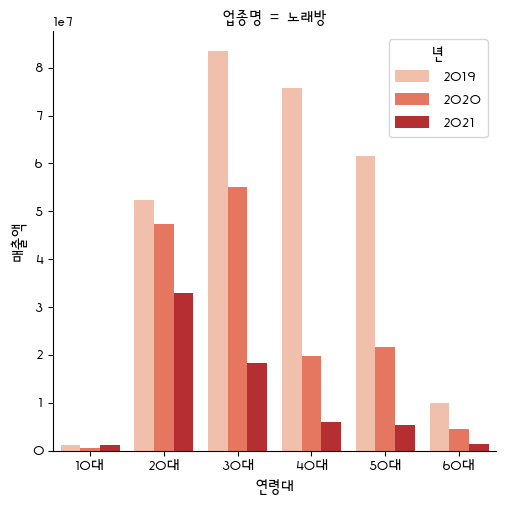

In [95]:
# 연령대별 매출액 변화를 시각화합니다.
# catplot : 카테고리, ci : 신뢰구간
df2 = df2.sort_values(by = ['연령대', '업종명'])
sns.catplot(data = df2, x = '연령대', y = '매출액', hue = '년', col = '업종명', kind = 'bar', 
            estimator = sum, ci = None, palette = 'Reds', legend_out = False);

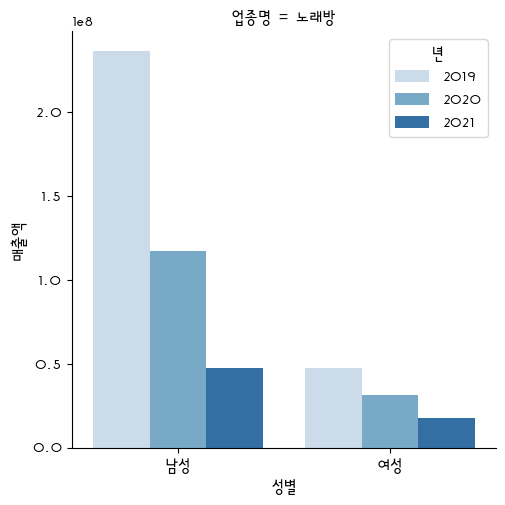

In [96]:
# 성별 매출액 변화를 시각화합니다.
df2 = df2.sort_values(by = ['성별', '업종명'])
sns.catplot(data = df2, x = '성별', y = '매출액', hue = '년', col = '업종명', kind = 'bar', 
            estimator = sum, ci = None, palette = 'Blues', legend_out = False);

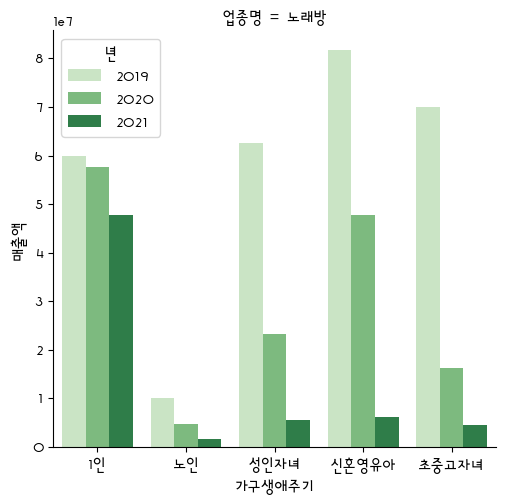

In [97]:
# 가구생애주기별 매출액 변화를 시각화합니다.
df2 = df2.sort_values(by = ['가구생애주기', '업종명'])
sns.catplot(data = df2, x = '가구생애주기', y = '매출액', hue = '년', col = '업종명', kind = 'bar', 
            estimator = sum, ci = None, palette = 'Greens', legend_out = False);

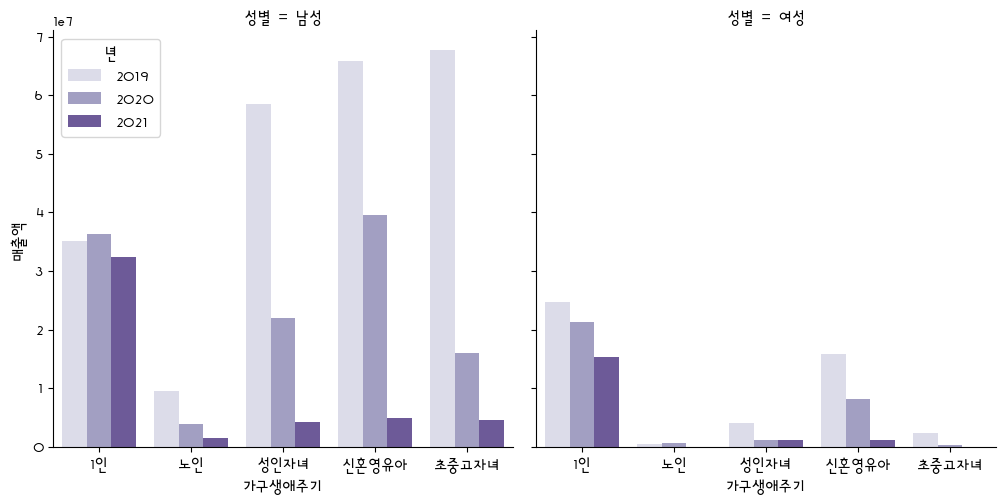

In [98]:
# 가구생애주기 및 성별 매출액 변화를 시각화합니다.
df2 = df2.sort_values(by = ['가구생애주기', '성별'])
sns.catplot(data = df2, x = '가구생애주기', y = '매출액', hue = '년', col = '성별', kind = 'bar', 
            estimator = sum, ci = None, palette = 'Purples', legend_out = False);

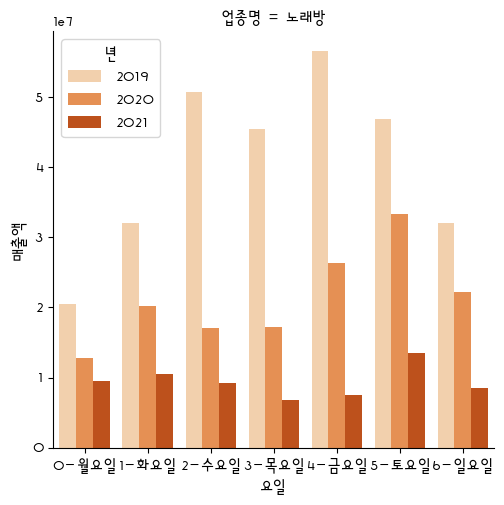

In [99]:
# 요일별 매출액 변화를 시각화합니다.
df2 = df2.sort_values(by = ['요일', '업종명'])
sns.catplot(data = df2, x = '요일', y = '매출액', hue = '년', col = '업종명', kind = 'bar', 
            estimator = sum, ci = None, palette = 'Oranges', legend_out = False);

### 지역 경계 데이터 전처리

- 특정한 지리 현상(예를 들어, 인구 변동 등)을 선택적으로 표현한 것을 '주제도'라고 합니다. 
- 주제도를 표현할 때, 지도를 행정구역으로 나누고 색상의 음영을 다르게 한 것으로 '단계구분도'라고 합니다.
- 단계구분도를 시각화하려면 지역 경계 데이터가 필요합니다.


- 지역 경계 데이터는 **법정동 및 행정동**으로 제공되며, **shape 또는 GeoJSON** 파일이 필요합니다.
- 이번 강의에서는 **행정동 경계** 데이터를 포함하는 **GeoJSON** 파일을 읽고 전처리하는 방법을 소개합니다.

#### [참고] 법정동과 행정동의 차이
- 법정동 : 법으로 지정된 대한민국 행정구역의 일종. 거의 변동 없음
- 행정동 : 법정동으로 지역의 통제가 되지 않으므로 지방자치단체가 분할/통합/조정한 행정구역. 수시로 변동

#### [참고] shape 파일이란?
- 확장자가 .shp인 파일로, 행정구역의 경계 좌표를 포함하고 있습니다.
- .shp 외에 .shx, .dbf, .prj 등이 함께 포함되어 있어야 제대로 읽을 수 있습니다.
 - Python에서 **geopandas** 라이브러리를 이용하면 .shp 파일을 쉽게 읽을 수 있습니다.


- **shape 파일**을 제공하는 사이트를 소개합니다.
 - [공간정보시스템](http://www.gisdeveloper.co.kr/?p=2332)에서 법정동의 행정경계 데이터를 제공하고 있습니다. (회원가입 필요 없는 가장 간단한 방법!)
 - 최신 '시군구' 행정경계 데이터를 압축파일로 다운로드합니다.
 - 압축파일을 풀면 **EMD_yyyymm** 폴더가 들어 있습니다.

#### [참고] GeoJSON 파일이란?
- 위치 정보를 갖는 점(경도, 위도)으로 체계적으로 지형을 표현하기 위해 설계된 개방형 공개 표준 형식입니다. (위키피디아 참조)
- **GeoJSON** 파일을 출력하면 **key:value**를 원소로 갖는 **Python 딕셔너리** 자료구조와 같습니다.
- JSON(JavaScript Object Notation)은 데이터를 송수신할 때 인간이 읽을 수 있는 개방행 표준 포맷입니다. (위키피디아 참조)


- 이번 강의에서 사용할 행정동 경계 데이터를 포함하는 GeoJSON 파일 원본은 [여기](https://raw.githubusercontent.com/vuski/admdongkor/master/ver20210401/HangJeongDong_ver20210401.geojson)에서 확인하세요.

### geopandas 라이브러리

* Python에서 지역 경계 데이터(shp 파일)을 읽을 때 주로 사용되는 라이브러리입니다.


* pandas 라이브러리의 데이터프레임과 유사합니다.
 - GeoDataFrame 및 GeoJSON 자료형을 다룰 수 있습니다.


* **Geometry** 자료형을 지원하므로, 여러 좌표를 하나로 묶은 **다각형(Polygon)** 처리가 쉽습니다.

### Windows에서 geopandas 라이브러리를 설치하려면 4개의 의존성 라이브러리를 먼저 설치해야 합니다.
- 4개의 의존성 라이브러리는 **GDAL, Fiona, pyproj, Rtree**이며, 설치하는 순서가 중요합니다!
- 문제는 의존성 라이브러리의 용량이 매우 커서 <u>**pip 또는 conda로 설치할 수 없다**</u>는 것입니다.
- 따라서 **Python 버전에 맞는 최신 whl 파일** 내려받고, whl 파일로 설치해야 합니다. (cp39 또는 cp38)
 - [GDAL](https://www.lfd.uci.edu/~gohlke/pythonlibs/#gdal)
 - [pyproj](https://www.lfd.uci.edu/~gohlke/pythonlibs/#pyproj)
 - [Fiona](https://www.lfd.uci.edu/~gohlke/pythonlibs/#fiona)
 - [Shapely](https://www.lfd.uci.edu/~gohlke/pythonlibs/#shapely)
 - [geopandas](https://www.lfd.uci.edu/~gohlke/pythonlibs/#geopandas)

In [81]:
# 현재 사용 중인 파이썬 버전을 확인합니다.
import sys
sys.version

'3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]'

In [100]:
# 라이브러리를 호출합니다.
from urllib.request import urlopen
import json
from shapely import geometry
import geopandas as gpd

In [101]:
# GeoJSON 파일이 포함된 URL을 지정합니다.
url = 'https://raw.githubusercontent.com/vuski/admdongkor/master/ver20210401/HangJeongDong_ver20210401.geojson'

In [102]:
# HTTP 요청을 통해 URL 데이터를 읽고, HTTP 응답을 받습니다.
res = urlopen(url)

In [103]:
# HTTP 응답 데이터로부터 GeoJSON 데이터를 읽습니다.
data = json.load(res)

In [104]:
# data의 feature만 선택하고, data에 재할당합니다.
data = data['features']

In [105]:
# geometry를 shape으로 변환합니다.
for d in data:
    d['geometry'] = geometry.shape(d['geometry'])

In [106]:
# data로 데이터프레임 shpDong를 생성합니다.
shpDong = pd.json_normalize(data)

In [107]:
# shpDong의 클래스를 확인합니다.
type(shpDong)

pandas.core.frame.DataFrame

In [108]:
# shpDong의 행과 열 길이를 확인합니다.
shpDong.shape

(3495, 10)

In [109]:
# shpDong의 일부를 출력합니다.
shpDong.head()

,type,geometry,properties.OBJECTID,properties.adm_nm,properties.adm_cd,properties.adm_cd2,properties.sgg,properties.sido,properties.sidonm,properties.sggnm
0,Feature,(POLYGON ((126.9768888427482 37.57565077944879...,1,서울특별시 종로구 사직동,1101053,1111053000,11110,11,서울특별시,종로구
1,Feature,"(POLYGON ((126.982689386493 37.5950655194224, ...",2,서울특별시 종로구 삼청동,1101054,1111054000,11110,11,서울특별시,종로구
2,Feature,(POLYGON ((126.9758511377569 37.59656422224409...,3,서울특별시 종로구 부암동,1101055,1111055000,11110,11,서울특별시,종로구
3,Feature,(POLYGON ((126.9750746678809 37.63138628651299...,4,서울특별시 종로구 평창동,1101056,1111056000,11110,11,서울특별시,종로구
4,Feature,"(POLYGON ((126.960673532739 37.58079784202973,...",5,서울특별시 종로구 무악동,1101057,1111057000,11110,11,서울특별시,종로구


In [110]:
# 서울특별시 강남구만 남깁니다.
shpDong = shpDong.loc[shpDong['properties.sgg'] == '11680']

In [111]:
# 필요한 열만 남깁니다.
shpDong = shpDong[['properties.adm_cd2', 'properties.adm_nm', 'geometry']]

In [112]:
# shpDong의 행과 열 길이를 다시 확인합니다.
shpDong.shape

(22, 3)

In [113]:
# shpDong의 일부를 출력합니다.
shpDong.head()

,properties.adm_cd2,properties.adm_nm,geometry
357,1168051000,서울특별시 강남구 신사동,"(POLYGON ((127.0280781532315 37.519584003369, ..."
358,1168052100,서울특별시 강남구 논현1동,(POLYGON ((127.0338873528466 37.50739203132641...
359,1168053100,서울특별시 강남구 논현2동,(POLYGON ((127.0391780751905 37.52290539552294...
360,1168058000,서울특별시 강남구 삼성1동,(POLYGON ((127.0669618590224 37.52508139275426...
361,1168059000,서울특별시 강남구 삼성2동,"(POLYGON ((127.05669182524 37.50685502947763, ..."


In [114]:
# shpDong의 행이름을 초기화합니다.
shpDong = shpDong.reset_index(drop = True)

In [115]:
# shpDong의 열이름을 변경합니다.
shpDong.columns = ['ADM_CD', 'ADM_NM', 'geometry']

In [116]:
# ADM_NM을 시도(SIDO), 시군구(SIGG), 행정동(DONG)으로 분리합니다.
# expand = True를 추가하면 데이터프레임으로 반환합니다.
dong = shpDong['ADM_NM'].str.split(pat = ' ', expand = True)

In [117]:
# dong의 일부를 출력합니다.
dong.head()

,0,1,2
0,서울특별시,강남구,신사동
1,서울특별시,강남구,논현1동
2,서울특별시,강남구,논현2동
3,서울특별시,강남구,삼성1동
4,서울특별시,강남구,삼성2동


In [118]:
# dong의 열이름을 변경합니다.
dong.columns = ['SIDO', 'SIGG', 'DONG']

In [119]:
# shpDong에 dong을 삽입합니다.
# [참고] dataframe.insert() 함수로는 시리즈만 삽입할 수 있습니다!
shpDong = pd.concat(objs = [shpDong[['ADM_CD']], dong, shpDong[['geometry']]], axis = 1)

In [120]:
# shpDong의 일부를 출력합니다.
shpDong.head()

,ADM_CD,SIDO,SIGG,DONG,geometry
0,1168051000,서울특별시,강남구,신사동,"(POLYGON ((127.0280781532315 37.519584003369, ..."
1,1168052100,서울특별시,강남구,논현1동,(POLYGON ((127.0338873528466 37.50739203132641...
2,1168053100,서울특별시,강남구,논현2동,(POLYGON ((127.0391780751905 37.52290539552294...
3,1168058000,서울특별시,강남구,삼성1동,(POLYGON ((127.0669618590224 37.52508139275426...
4,1168059000,서울특별시,강남구,삼성2동,"(POLYGON ((127.05669182524 37.50685502947763, ..."


In [121]:
# shpDong를 GeoDataFrame으로 변환합니다.
shpDong = gpd.GeoDataFrame(shpDong)

In [122]:
# shpDong의 클래스를 확인합니다.
type(shpDong)

geopandas.geodataframe.GeoDataFrame

#### [참고] shape 파일을 읽는 방법을 소개합니다.

In [123]:
# shpDong의 일부를 출력합니다.
shpDong.head()

,ADM_CD,SIDO,SIGG,DONG,geometry
0,1168051000,서울특별시,강남구,신사동,"MULTIPOLYGON (((127.02808 37.51958, 127.02721 ..."
1,1168052100,서울특별시,강남구,논현1동,"MULTIPOLYGON (((127.03389 37.50739, 127.02447 ..."
2,1168053100,서울특별시,강남구,논현2동,"MULTIPOLYGON (((127.03918 37.52291, 127.04124 ..."
3,1168058000,서울특별시,강남구,삼성1동,"MULTIPOLYGON (((127.06696 37.52508, 127.06650 ..."
4,1168059000,서울특별시,강남구,삼성2동,"MULTIPOLYGON (((127.05669 37.50686, 127.04904 ..."


#### 좌표계 (위도와 경도) 종류

* **WGS84** : GPS가 사용하는 좌표계 (EPSG: 4326) - 국제표준  
* **UTM-K(Bessel)** : 새주소지도에서 사용 중인 좌표계 (EPSG: 5178)
* **UTM-K(GRS80)** : 네이버 지도에서 사용 중인 좌표계 (EPSG: 5179)


* 출처 : https://www.osgeo.kr/17

In [124]:
# shpDong의 좌표계를 확인합니다. (값이 없을 수 있습니다!)
shpDong.crs

#### 단계구분도 시각화용 GeoJSON 파일 저장

In [125]:
# 현재 작업경로를 확인합니다.
os.getcwd()

'C:\\Users\\Sum\\Desktop\\Sumin\\06.STUDY\\DATA\\01.python\\BC카드 금융빅데이터플랫폼 활용교육\\data'

In [126]:
# shpDong를 GeoJSON 파일로 저장합니다. 
shpDong.to_file(filename = 'shpDong.json', driver = 'GeoJSON')

#### 단계구분도 시각화용 요약 데이터셋 생성

In [127]:
# 요약 데이터셋을 생성하는 함수를 정의합니다.
# 이 함수는 행정동별 전년 대비 2021년 매출액 차이를 데이터프레임으로 반환합니다.
def smrfunc(upjong):
    
    # 업종명을 포함하는 부분집합을 생성합니다.
    sub = df.loc[df['업종명'] == upjong]
    
    # 행정동, 년 기준으로 매출액 합계를 계산합니다.
    smr = sub.groupby(by = ['읍면동', '년']).sum()[['매출액']]
    
    # Long Type을 Wide Type으로 변환하고, 결측값을 갖는 행을 삭제합니다.
    smr = smr.unstack(fill_value = 0).dropna()
    
    # 열이름에서 0번 레벨과 1번 레벨의 Name을 제거합니다.
    smr.columns = smr.columns.droplevel(level = 0)
    smr.columns.name = None
    
    # 행이름을 초기화합니다.
    smr = smr.reset_index()
    
    # 전년 대비 2021년 매출액 차이를 새로운 변수로 생성합니다.
    smr['매출차이'] = smr[2021] - smr[2020]
    
    # smr에서 불필요한 열(2019~2021)을 삭제합니다.
    smr = smr.drop(labels = smr.columns[1:4], axis = 1)
    
    # 매출차이의 단위를 원에서 백만원으로 변경하고, 정수부분만 남도록 반올림합니다.
    smr['매출차이'] = (smr['매출차이'] / 1000000).round(0)
    
    # 단계구분도에서 마우스를 올렸을 때 출력할 정보를 생성합니다.
    smr['HOVER'] = smr['읍면동'] + ' : ' + smr['매출차이'].astype('str')
    
    # smr을 반환합니다.
    return smr

In [147]:
# 일반한식 업종의 요약 데이터셋을 생성합니다.
# HOVER : 마우스 오버레이시 찍기 위해서 
smr1 = smrfunc(upjong = '일반한식')
smr1.sort_values(by = ['매출차이'], ascending = False)

,읍면동,매출차이,HOVER
20,일원본동,51.0,일원본동 : 51.0
1,개포2동,2.0,개포2동 : 2.0
8,도곡1동,1.0,도곡1동 : 1.0
0,개포1동,-0.0,개포1동 : -0.0
19,일원2동,-10.0,일원2동 : -10.0
13,수서동,-13.0,수서동 : -13.0
12,세곡동,-18.0,세곡동 : -18.0
2,개포4동,-22.0,개포4동 : -22.0
9,도곡2동,-39.0,도곡2동 : -39.0
5,대치1동,-65.0,대치1동 : -65.0


In [129]:
# 서양음식 업종의 요약 데이터셋을 생성합니다.
smr2 = smrfunc(upjong = '서양음식')
smr2.sort_values(by = ['매출차이'], ascending = False)

,읍면동,매출차이,HOVER
15,압구정동,47.0,압구정동 : 47.0
10,삼성1동,40.0,삼성1동 : 40.0
9,도곡2동,6.0,도곡2동 : 6.0
12,세곡동,1.0,세곡동 : 1.0
0,개포1동,-0.0,개포1동 : -0.0
19,일원2동,-2.0,일원2동 : -2.0
2,개포4동,-3.0,개포4동 : -3.0
20,일원본동,-3.0,일원본동 : -3.0
1,개포2동,-4.0,개포2동 : -4.0
8,도곡1동,-12.0,도곡1동 : -12.0


In [130]:
# 편의점 업종의 요약 데이터셋을 생성합니다.
smr3 = smrfunc(upjong = '편의점')
smr3.sort_values(by = ['매출차이'], ascending = False)

,읍면동,매출차이,HOVER
11,삼성2동,26.0,삼성2동 : 26.0
2,개포4동,21.0,개포4동 : 21.0
10,삼성1동,20.0,삼성1동 : 20.0
17,역삼2동,18.0,역삼2동 : 18.0
12,세곡동,15.0,세곡동 : 15.0
21,청담동,14.0,청담동 : 14.0
19,일원2동,9.0,일원2동 : 9.0
18,일원1동,6.0,일원1동 : 6.0
1,개포2동,5.0,개포2동 : 5.0
20,일원본동,4.0,일원본동 : 4.0


In [131]:
# 노래방 업종의 요약 데이터셋을 생성합니다.
smr4 = smrfunc(upjong = '노래방')
smr4.sort_values(by = ['매출차이'], ascending = False)

,읍면동,매출차이,HOVER
4,대치1동,1.0,대치1동 : 1.0
11,세곡동,1.0,세곡동 : 1.0
0,개포2동,-0.0,개포2동 : -0.0
8,도곡2동,-0.0,도곡2동 : -0.0
16,역삼2동,-0.0,역삼2동 : -0.0
12,수서동,-0.0,수서동 : -0.0
10,삼성2동,-0.0,삼성2동 : -0.0
18,청담동,0.0,청담동 : 0.0
7,도곡1동,0.0,도곡1동 : 0.0
5,대치2동,0.0,대치2동 : 0.0


### 지도 시각화 : folium 라이브러리

#### folium 라이브러리

* 웹 상에서 지도를 표현할 때 많이 사용되는 leaflet.js를 Python에서 구현한 라이브러리입니다.

* WGS84 좌표계의 위도와 경도를 지정하면, 해당 지점을 중심으로 하는 지도를 호출합니다.

* 지도 위에 단계구분도 표현이 가능하므로 쉽고 깔끔한 지도 시각화가 가능합니다.

In [132]:
# 라이브러리를 호출합니다.
import folium

In [133]:
# shpDong의 total_bounds를 확인합니다.
shpDong.geometry.total_bounds

# 전체 좌표의 왼쪽 하단, 오른쪽 상단의 좌표가 포함되어 있습니다.

array([127.01186811,  37.4585943 , 127.1224237 ,  37.53886431])

In [134]:
# 좌표의 전체 범위를 각각 지정합니다.
x1, y1, x2, y2 = shpDong.geometry.total_bounds

In [135]:
# 전체 범위의 중간 지점을 계산하여 중심 좌표로 설정합니다.
# [주의] 위도, 경도 순으로 지정해야 합니다!
center = (y1 + y2) / 2, (x1 + x2) / 2
center

(37.49872930143057, 127.06714590503586)

In [136]:
# GeoJSON 파일을 읽고 출력합니다.
raw = open(file = 'shpDong.json', mode = 'rb')
jsonData = json.load(raw)

#### 지도 생성 : folium.Map() 함수의 tiles 매개변수에 지도 타입 설정
- 'OpenStreetmap'(기본값)
- 'Stamen Terrain'
- 'Stamen Toner' 등

In [153]:
# 지도를 생성합니다.
# [주의] 중심 좌표는 위도, 경도 순으로 지정되어야 합니다.
Map = folium.Map(location = center, zoom_start = 13, tiles = 'Stamen Terrain')

# 지도를 출력합니다.
Map

In [154]:
# 지도에 행정동 경계를 추가합니다.
Choro = folium.Choropleth(
    geo_data = jsonData,
    key_on = 'feature.properties.DONG',
    fill_color = 'white',
    fill_opacity = 0.5,
    line_color = 'red',
    line_opacity = 1,
    name = '행정경계',
    highlight = True
).add_to(Map)

# 행정동 위에 마우스를 올렸을 때 출력할 데이터를 설정합니다.
Choro.geojson.add_child(
    folium.features.GeoJsonTooltip(fields = ['DONG'], labels = False)
)

# 지도를 출력합니다.
Map

In [156]:
# 지도에 첫 번째 단계구분도를 추가합니다. (일반한식)
Choro = folium.Choropleth(
    geo_data = jsonData,
    data = smr1,
    columns = ['읍면동', '매출차이'],
    key_on = 'feature.properties.DONG',
    fill_color = 'Reds',
    nan_fill_color = 'Gray',
    line_color = 'black',
    fill_opacity = 0.3,
    line_opacity = 1,
    name = '일반한식',
    legend_name = '매출차이(일반한식)',
    highlight = True
).add_to(Map)

# 행정동 위에 마우스를 올렸을 때 출력할 데이터를 설정합니다.
Choro.geojson.add_child(
    folium.features.GeoJsonTooltip(fields = ['DONG'], labels = False)
)

# 지도를 출력합니다.
Map

In [157]:
# 지도에 두 번째 단계구분도를 추가합니다. (서양음식)
Choro = folium.Choropleth(
    geo_data = jsonData,
    data = smr2,
    columns = ['읍면동', '매출차이'],
    key_on = 'feature.properties.DONG',
    fill_color = 'Blues',
    nan_fill_color = 'Gray',
    line_color = 'black',
    fill_opacity = 0.3,
    line_opacity = 1,
    name = '서양음식',
    legend_name = '매출차이(서양음식)',
    highlight = True
).add_to(Map)

# 행정동 위에 마우스를 올렸을 때 출력할 데이터를 설정합니다.
Choro.geojson.add_child(
    folium.features.GeoJsonTooltip(fields = ['DONG'], labels = False)
)

# 지도를 출력합니다.
Map

In [158]:
# 지도에 세 번째 단계구분도를 추가합니다. (편의점)
Choro = folium.Choropleth(
    geo_data = jsonData,
    data = smr3,
    columns = ['읍면동', '매출차이'],
    key_on = 'feature.properties.DONG',
    fill_color = 'Greens',
    nan_fill_color = 'Gray',
    line_color = 'black',
    fill_opacity = 0.3,
    line_opacity = 1,
    name = '편의점',
    legend_name = '매출차이(편의점)',
    highlight = True
).add_to(Map)

# 행정동 위에 마우스를 올렸을 때 출력할 데이터를 설정합니다.
Choro.geojson.add_child(
    folium.features.GeoJsonTooltip(fields = ['DONG'], labels = False)
)

# 지도를 출력합니다.
Map

In [159]:
# 지도에 네 번째 단계구분도를 추가합니다. (노래방)
Choro = folium.Choropleth(
    geo_data = jsonData,
    data = smr4,
    columns = ['읍면동', '매출차이'],
    key_on = 'feature.properties.DONG',
    fill_color = 'Oranges',
    nan_fill_color = 'Gray',
    line_color = 'black',
    fill_opacity = 0.3,
    line_opacity = 1,
    name = '노래방',
    legend_name = '매출차이(노래방)',
    highlight = True
).add_to(Map)

# 행정동 위에 마우스를 올렸을 때 출력할 데이터를 설정합니다.
Choro.geojson.add_child(
    folium.features.GeoJsonTooltip(fields = ['DONG'], labels = False)
)

# 지도를 출력합니다.
Map

In [160]:
# 지도에 추가된 레이어를 제어하는 메뉴 버튼을 추가합니다.
folium.LayerControl().add_to(Map)

# 지도를 출력합니다.
Map

In [144]:
# 현재 작업경로의 상위 폴더에 image 폴더가 없으면 생성합니다.
# image 폴더에 시각화 결과를 png 파일로 저장합니다.
if 'image' not in os.listdir(path = '..'):
    os.mkdir(path = '../image')

In [145]:
# image 폴더로 작업경로를 변경합니다.
os.chdir(path = '../image')

In [146]:
# HTML 파일로 저장합니다.
Map.save(outfile = 'Choropleth.html')

<p style="font-family:verdana;font-size:200%;text-align:center">End of Document</p>